In [41]:
import xarray as xr
import numpy as np
soda = xr.open_dataset("soda3.3.1_monthly_ocean_reg_1997_01.nc")

soda = soda.assign_coords(xt_ocean=(np.where(soda.xt_ocean.values > 180., soda.xt_ocean.values - 360, soda.xt_ocean.values)))
#soda.lons.shape
#soda = soda.swap_dims({'xt_ocean' : 'lons'})

In [52]:
soda = soda.reindex(xt_ocean=sorted(soda.xt_ocean.values))

In [36]:
sponge = xr.open_dataset("soda3.3.1_monthly_1997_01.nc")

In [5]:
sponge

<xarray.Dataset>
Dimensions:  (time: 1, xh: 1678, yh: 1844, zl: 41)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-16T01:00:00
  * zl       (zl) float64 0.5 1.9 4.42 8.38 ... 1.899e+03 2.399e+03 4.6e+03
Dimensions without coordinates: xh, yh
Data variables:
    temp     (time, zl, yh, xh) float64 ...
    salt     (time, zl, yh, xh) float64 ...
    ssh      (time, yh, xh) float64 ...
Attributes:
    regrid_method:  bilinear

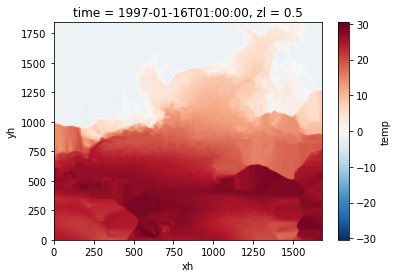

In [7]:
sponge.temp.isel(time=0, zl=0).plot()

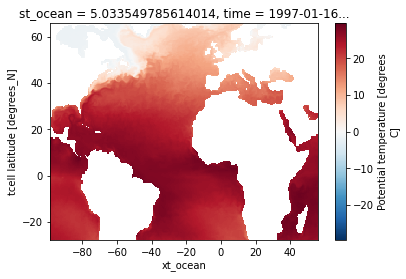

In [72]:
soda.temp.isel(time=0, st_ocean=0).sel(yt_ocean = slice(-28, 66), xt_ocean=slice(-98.25, 55.75)).plot()

In [60]:
s1 = soda.temp.isel(time=0, st_ocean=0).sel(yt_ocean = slice(-28, 66), xt_ocean=slice(-98.25, 55.75))

In [61]:
s2 = sponge.temp.isel(time=0, zl=0)

In [62]:
s1

<xarray.DataArray 'temp' (yt_ocean: 188, xt_ocean: 309)>
array([[24.507769, 24.495994, 24.588774, ..., 25.709619, 25.705314, 25.64845 ],
       [24.602978, 24.542313, 24.528319, ..., 26.027733, 25.957263, 25.810263],
       [24.556192, 24.485114, 24.424078, ..., 26.247363, 26.098869, 26.015427],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -98.25 -97.75 -97.25 ... 54.75 55.25 55.75
  * yt_ocean  (yt_ocean) float64 -27.75 -27.25 -26.75 ... 64.75 65.25 65.75
    st_ocean  float64 5.034
    time      object 1997-01-16 01:00:00
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

In [63]:
s2

<xarray.DataArray 'temp' (yh: 1844, xh: 1678)>
[3094232 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 1997-01-16T01:00:00
    zl       float64 0.5
Dimensions without coordinates: yh, xh

In [64]:
np.mean(s1)

<xarray.DataArray 'temp' ()>
array(19.51858926)
Coordinates:
    st_ocean  float64 5.034
    time      object 1997-01-16 01:00:00

In [71]:
np.min(s1)

<xarray.DataArray 'temp' ()>
array(-1.8338524)
Coordinates:
    st_ocean  float64 5.034
    time      object 1997-01-16 01:00:00

In [73]:
g = xr.open_dataset("/Users/james/Documents/Github/esm_lab/obc_ic/gridInfo/natlGrid/natl_ocean_hgrid.nc")

In [74]:
g.y.values

array([[-27.97700882, -27.97700882, -27.97700882, ..., -27.97700882,
        -27.97700882, -27.97700882],
       [-27.94168472, -27.94168472, -27.94168472, ..., -27.94168472,
        -27.94168472, -27.94168472],
       [-27.90633583, -27.90633583, -27.90633583, ..., -27.90633583,
        -27.90633583, -27.90633583],
       ...,
       [ 51.64527893,  51.66788101,  51.69047546, ...,  66.291008  ,
         66.27435303,  66.25769806],
       [ 51.64673615,  51.66934586,  51.69194794, ...,  66.29710388,
         66.28044128,  66.26377869],
       [ 51.64819336,  51.6708107 ,  51.69342041, ...,  66.30319977,
         66.28652954,  66.26985931]])